O notebook da Aula 1 foi separado em duas etapas:
- [Explicações e Aula Alura]()
- [Desafios e Playground]()

# Playground (testes e afins)

### Importando dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 15) #mostra apenas 15 colunas quando manda plotar tudo (esse dataset tem mais de 800)
import matplotlib.pyplot as plt

url_dados = 'https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

### Entender os dados

In [ ]:
dados.head(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Entendendo os dados

- id = identificador único para cada experimento {0 até 23813}

- tempo = tempo de espera para análise {24, 48, 72}

- tratamento = categorias {com_droga, com_controle}

- dose = Diferentes Dosagens {D1, D2}

- drogas = tipos de substâncias testadas {Drogas com nomes anonimos para não ter viés}

- g_x = dados de expressão genética, dados normalizados {provavelmente de -2 a 2}

In [ ]:
dict_tempos = dados['tempo'].value_counts().to_dict()

for key in dict_tempos:
  print(f"Temos {dict_tempos[key]} amostras com {key} horas")

Temos 8250 amostras com 48 horas
Temos 7792 amostras com 72 horas
Temos 7772 amostras com 24 horas


In [ ]:
dict_drogas = dados['droga'].value_counts().to_dict()

for key in dict_drogas:
  #print(f"Temos {dict_drogas[key]} amostras com a droga {key}")
  continue

### Avaliando Grafico de pizza

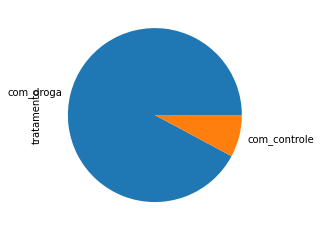

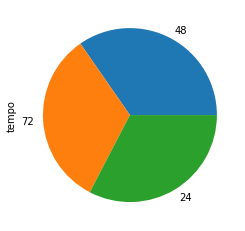

In [ ]:
dados['tratamento'].value_counts().plot.pie()
plt.show()
dados['tempo'].value_counts().plot.pie()
plt.show()

Com esses 2 graficos que conseguimos extrair a seguinte informação:
- 1º: o tratamento parece desbalanceado (temos mais testes com drogas do que com_controle)
- 2º: O tempo das amostras é mais balanceado quando comparado com o tratamento
- 3º: Não conseguimos extrair muitas informações de um grafico de pizza

*Recomendação: não utilizar graficos com nome de comida (e.g., pizza, donut)...*

# Desafios 

- *Desafio 01*: Investigar por que a classe tratamento é tão desbalanceada?
- *Desafio 02*: Plotar as 5 últimas linhas da tabela
- *Desafio 03*: Proporção das classes tratamento.
- *Desafio 04*: Quantas tipos de drogas foram investigados.
- *Desafio 05*: Procurar na documentação o método query(pandas). 
- *Desafio 06*: Renomear as colunas tirando o hífen. 
- *Desafio 07*: Deixar os gráficos bonitões. (Matplotlib.pyplot)
- *Desafio 08*: Resumir o que você aprendeu com os dados.

## Desafio 1

**Investigar por que a classe tratamento é tão desbalanceada?**

## Desafio 2

## Desafio 3

## Desafio 4

## Desafio 5

## Desafio 6

## Desafio 7

## Desafio 8